# Laboratorio 01

- Mario Guerra
- Javier Alvarado

El conjunto de datos fue recolectado en el “Hospital Universitario de Caracas” en Venezuela. Comprende
información demográfica, hábitos y registros históricos de 858 pacientes. A continuación, la importación del dataset a nuestro ambiente de Python.

In [13]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd  

# fetch dataset 
cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
  
# data (as pandas dataframes) 
X = cervical_cancer_risk_factors.data.features 
y = cervical_cancer_risk_factors.data.targets 
  
# metadata 
#print(cervical_cancer_risk_factors.metadata) 
  

# Combine features and targets into a single DataFrame for convenience
df = pd.concat([X, y], axis=1)
  
# variable information 
print(cervical_cancer_risk_factors.variables) 

                                  name     role        type demographic  \
0                                  Age  Feature     Integer         Age   
1            Number of sexual partners  Feature  Continuous       Other   
2             First sexual intercourse  Feature  Continuous        None   
3                   Num of pregnancies  Feature  Continuous        None   
4                               Smokes  Feature  Continuous        None   
5                       Smokes (years)  Feature  Continuous        None   
6                  Smokes (packs/year)  Feature  Continuous        None   
7              Hormonal Contraceptives  Feature  Continuous        None   
8      Hormonal Contraceptives (years)  Feature  Continuous        None   
9                                  IUD  Feature  Continuous        None   
10                         IUD (years)  Feature  Continuous        None   
11                                STDs  Feature  Continuous        None   
12                       

# Informe automatizado

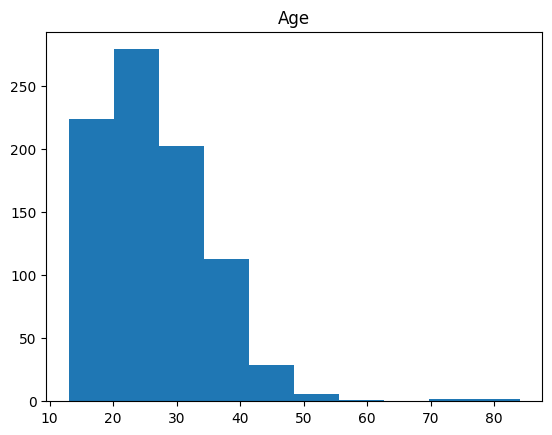

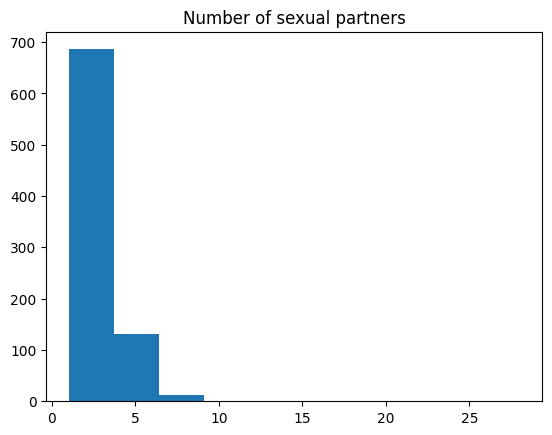

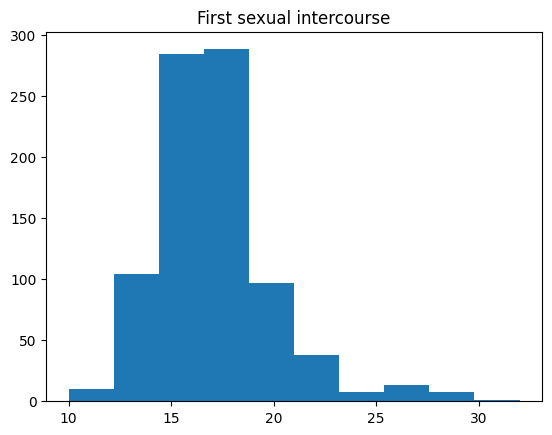

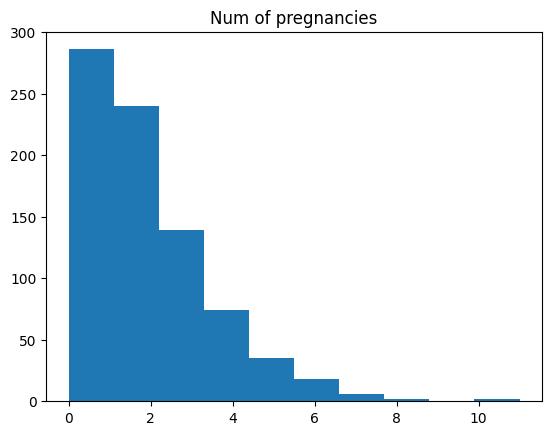

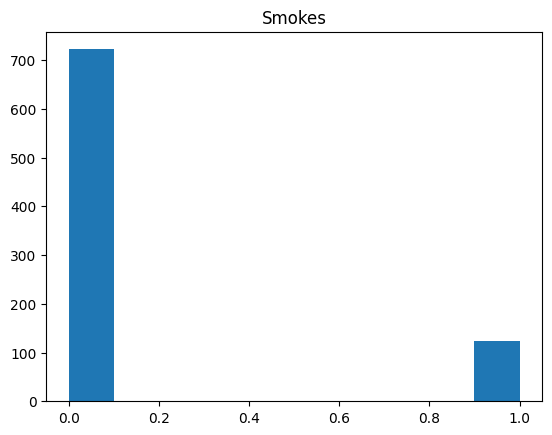

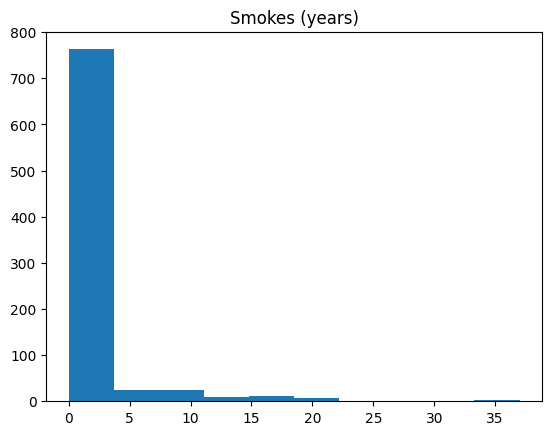

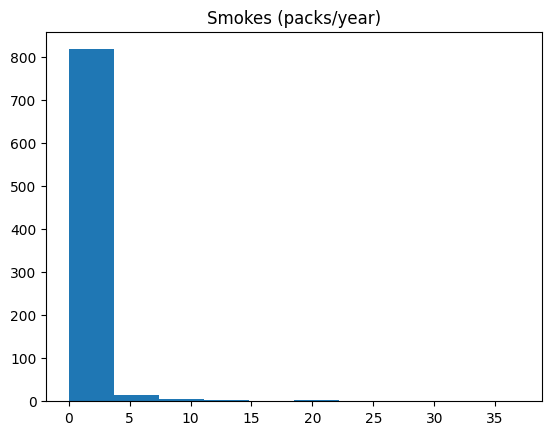

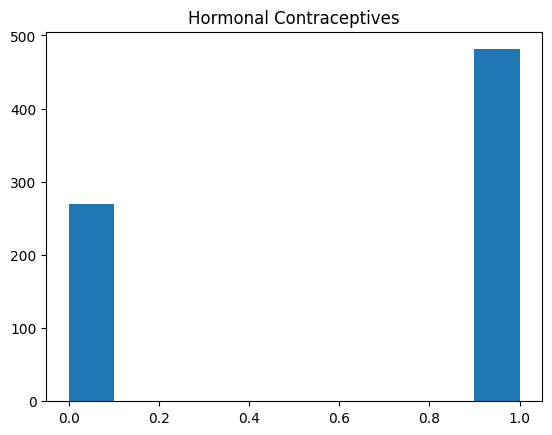

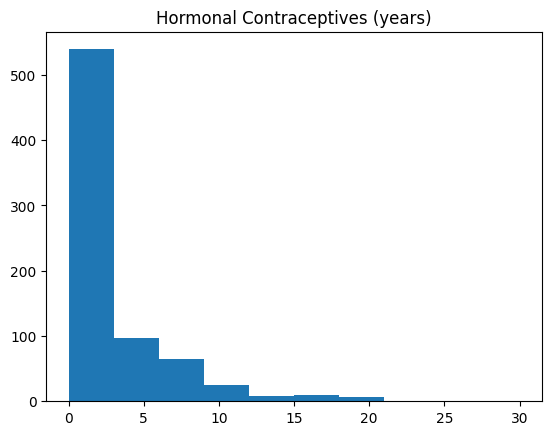

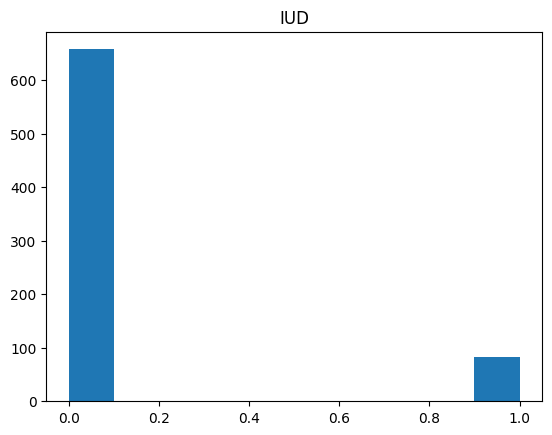

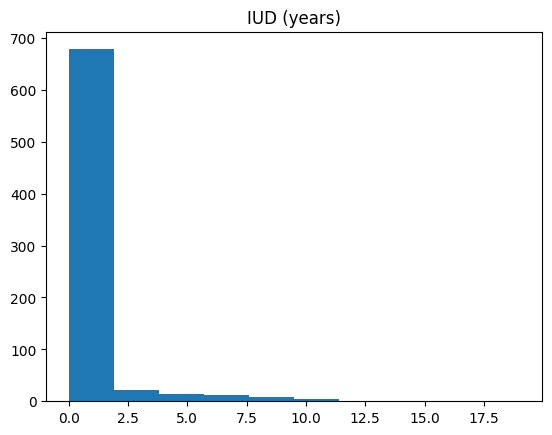

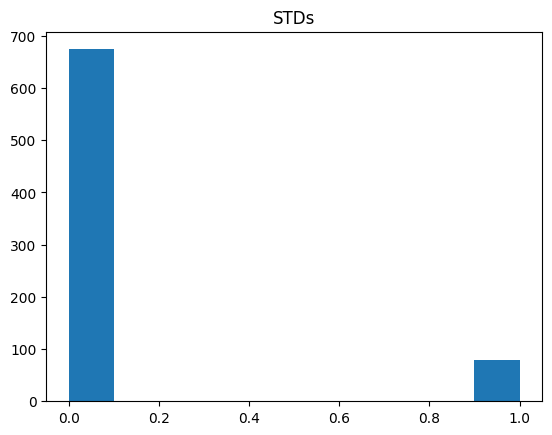

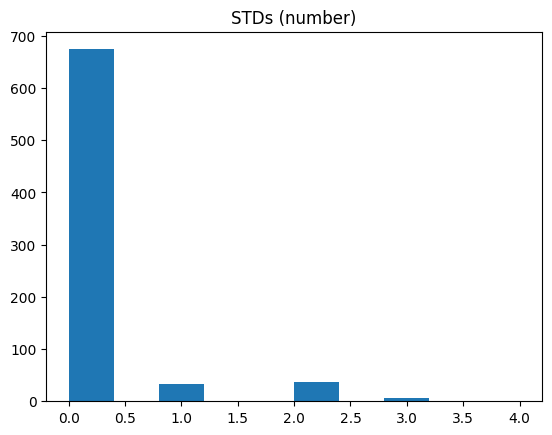

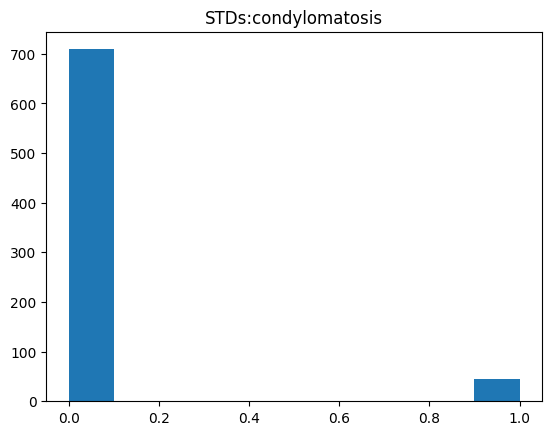

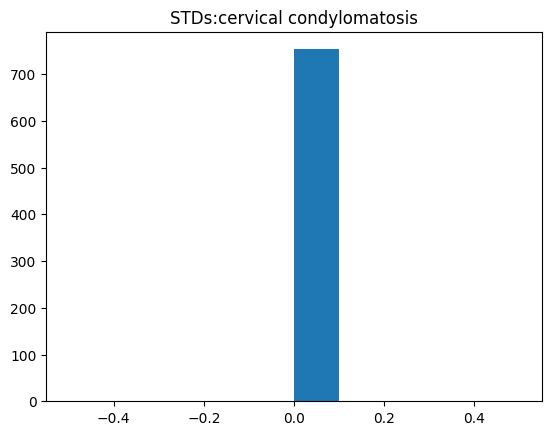

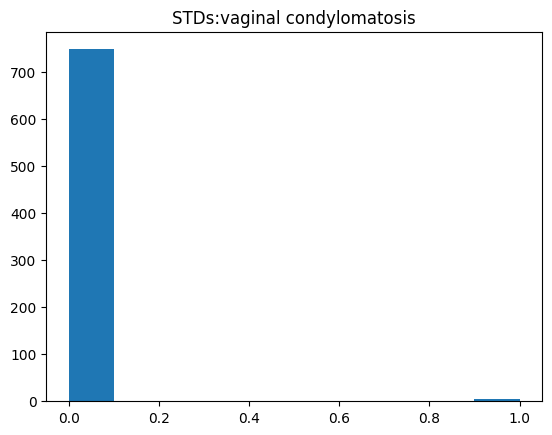

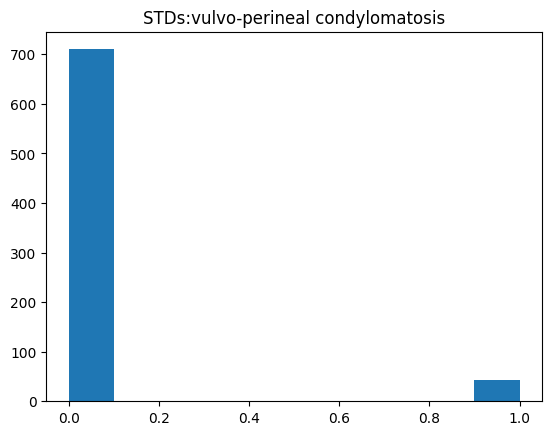

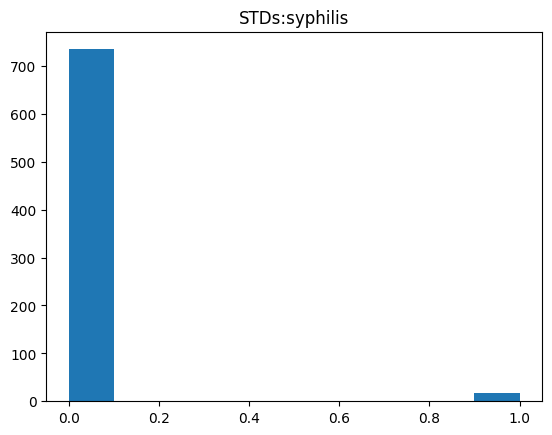

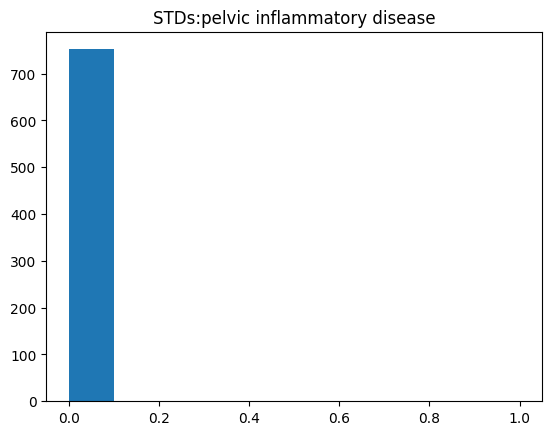

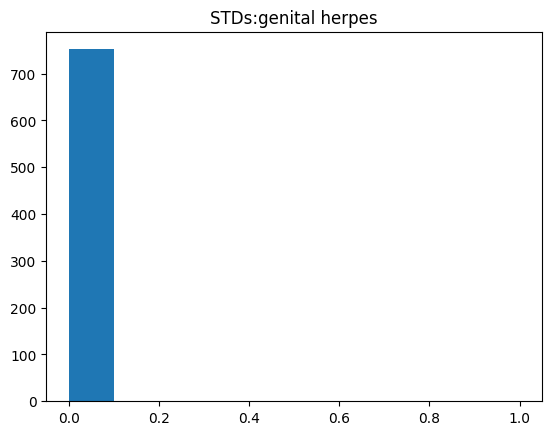

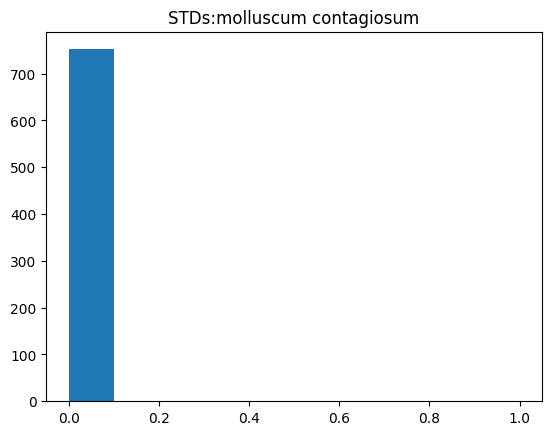

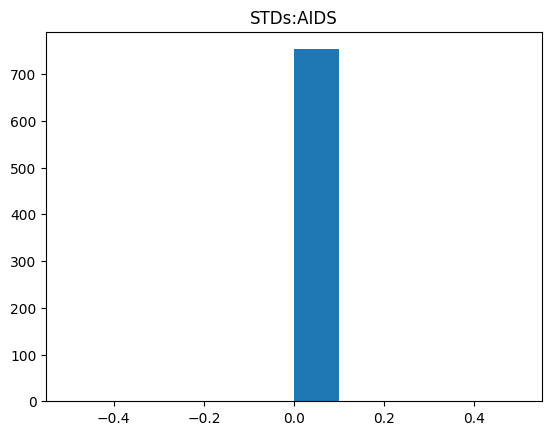

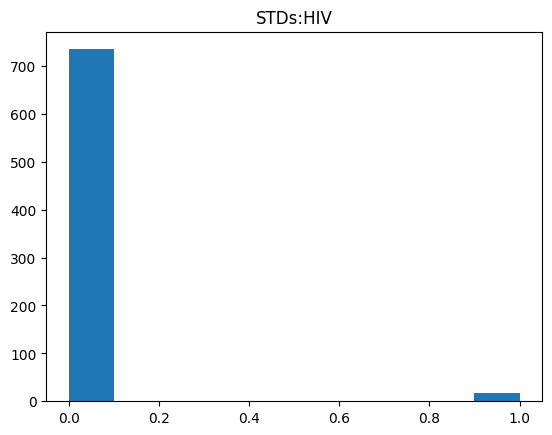

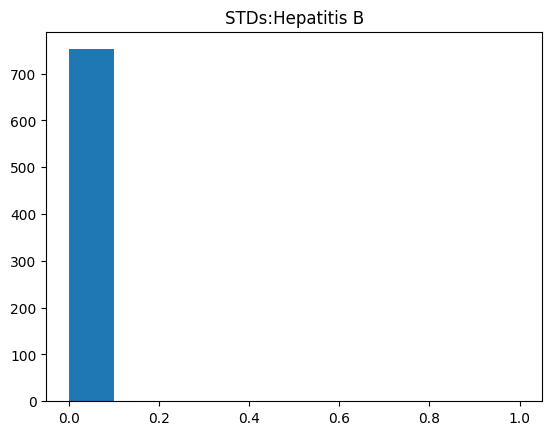

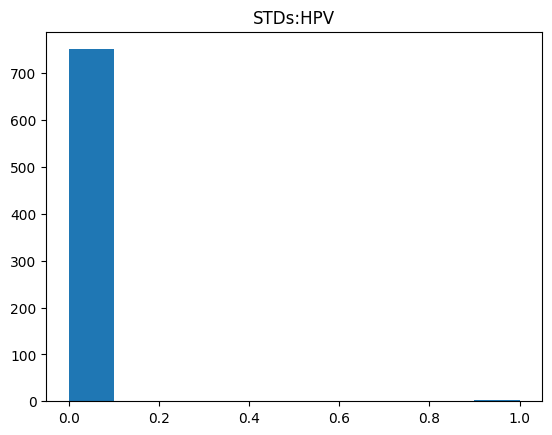

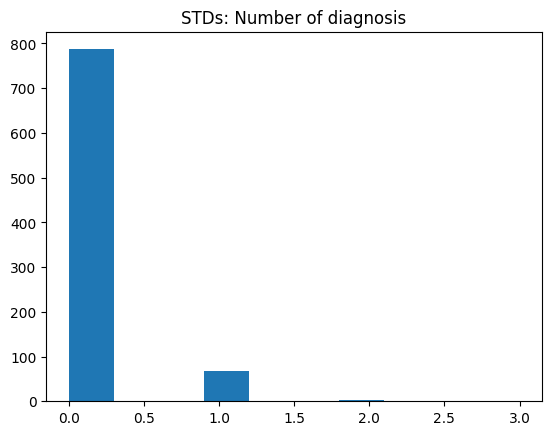

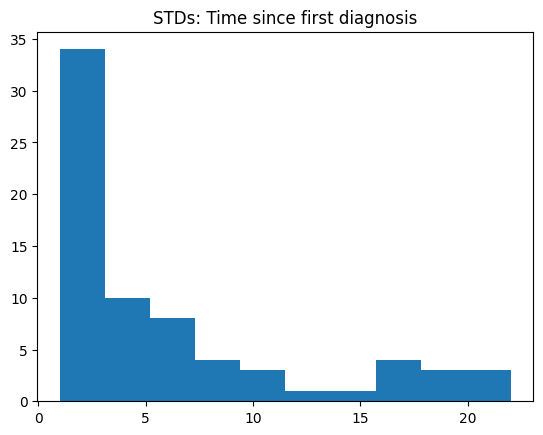

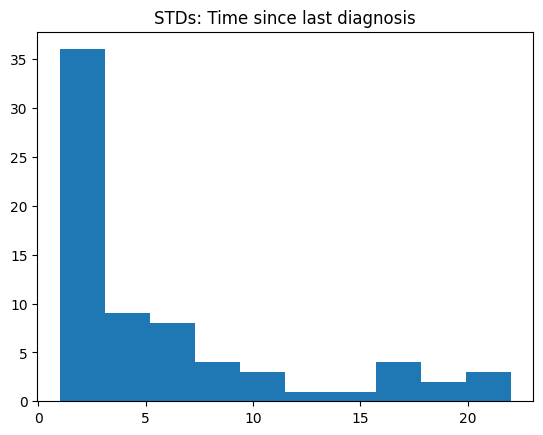

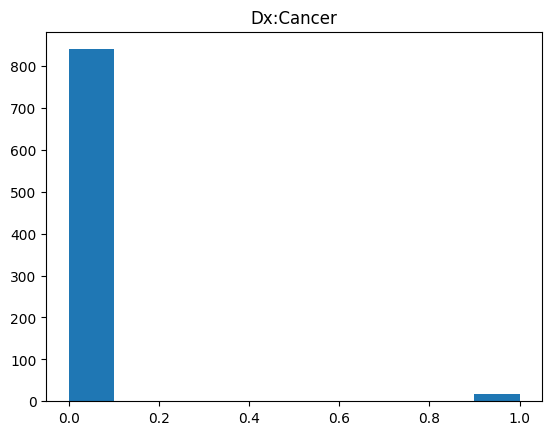

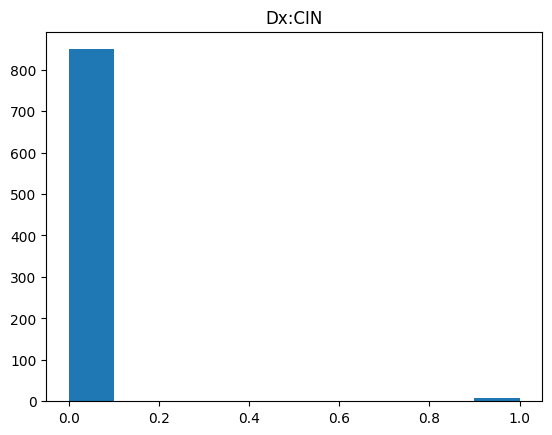

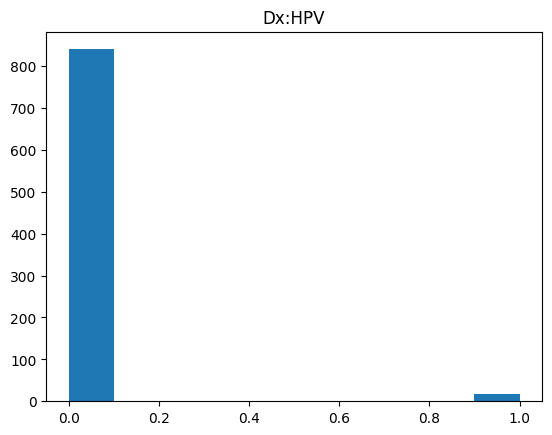

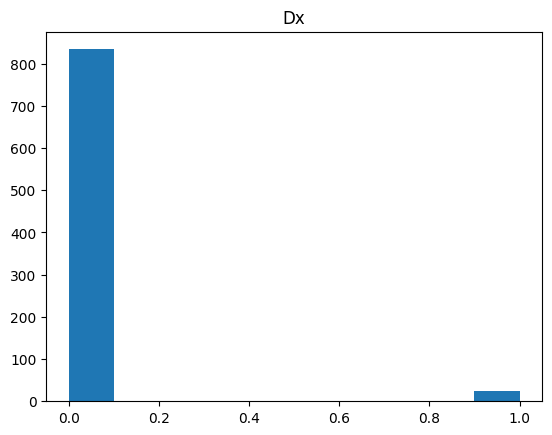

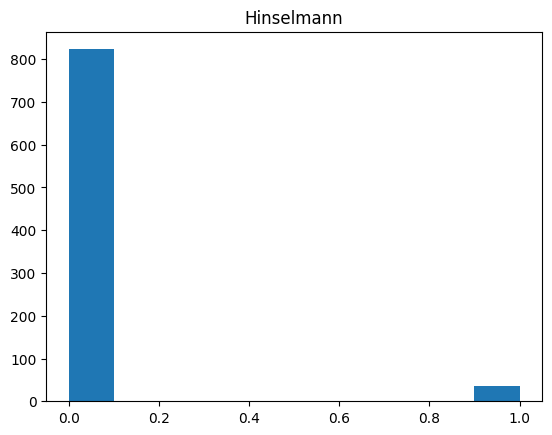

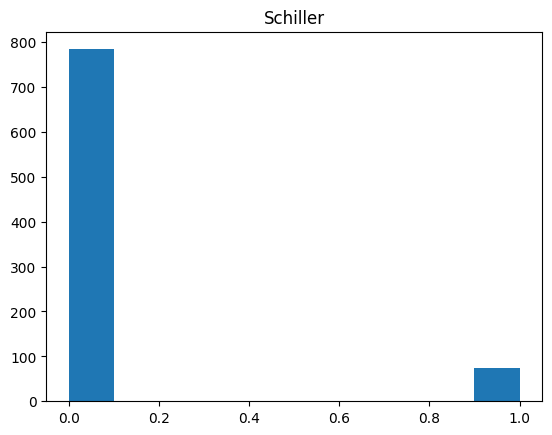

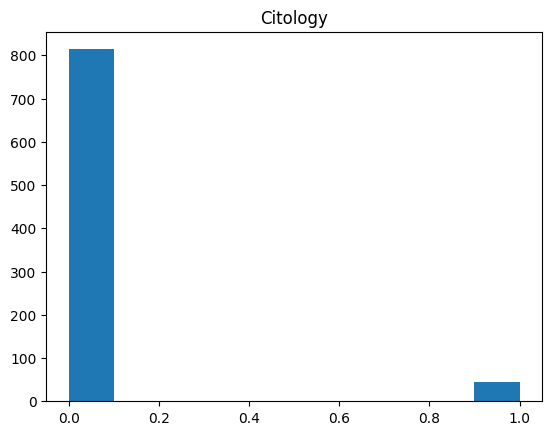

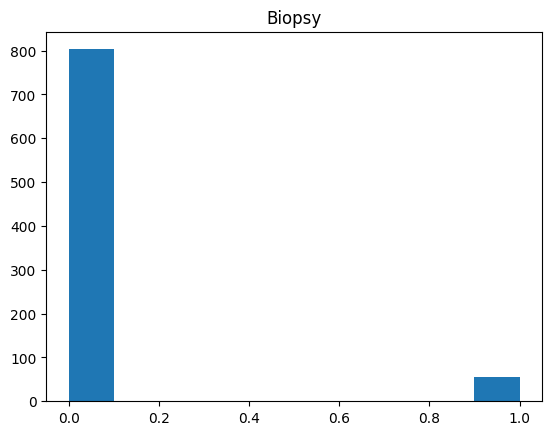

c:\Users\Kristopher\Documents\S8\Data Science\Lab01\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 11.05it/s]


In [3]:
import matplotlib.pyplot as plt

for col in X.columns:
  plt.hist(X[col])
  plt.title(col)
  plt.show()

from ydata_profiling import ProfileReport

report = ProfileReport(X)
report.to_file("data_profile.html")

## Script para generar el tipo de dato del dataset
A continuación, un script para obtener un archivo de excel en donde se nos indica el tipo de dato de cada una de las variables del dataset (cualitativa o categorica, cuantitativa continua, cuantitativa discreta)

In [4]:
import pandas as pd
from ucimlrepo import fetch_ucirepo


# Combine features and targets into a single DataFrame for convenience
df = pd.concat([X, y], axis=1)

# Function to determine the type of each variable
def determine_variable_type(df):
    variable_types = {}
    for column in df.columns:
        unique_values = df[column].unique()
        num_unique_values = len(unique_values)
        
        if set(unique_values).issubset({0, 1}) and pd.api.types.is_numeric_dtype(df[column]):
            variable_types[column] = 'Cualitativa (boolean)'
        elif pd.api.types.is_numeric_dtype(df[column]):
            if num_unique_values <= 10:
                variable_types[column] = 'Cuantitativa discreta'
            else:
                variable_types[column] = 'Cuantitativa continua'
        else:
            variable_types[column] = 'Cualitativa o categórica'
    
    return variable_types

# Determine variable types
variable_types = determine_variable_type(df)

# Convert the variable types dictionary to a DataFrame
variable_types_df = pd.DataFrame(list(variable_types.items()), columns=['Variable', 'Tipo'])

# Save the dataset and the variable types to an Excel file
with pd.ExcelWriter('cervical_cancer_data.xlsx') as writer:
    df.to_excel(writer, sheet_name='Datos', index=False)
    variable_types_df.to_excel(writer, sheet_name='Tipos de Variables', index=False)

print("El archivo de Excel ha sido generado y guardado como 'cervical_cancer_data.xlsx'.")


El archivo de Excel ha sido generado y guardado como 'cervical_cancer_data.xlsx'.


### Gráficos exploratorios

Aquí se incluyen los gráficos exploratorios consecuentes en base al tipo de variable.

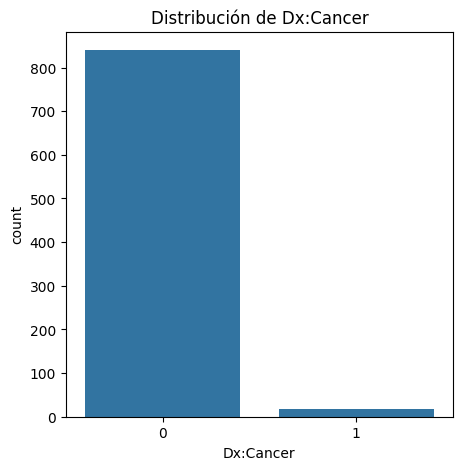

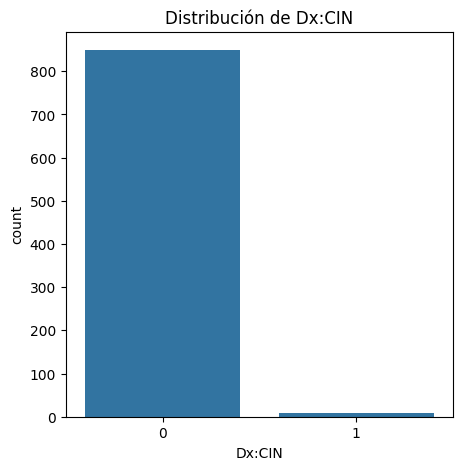

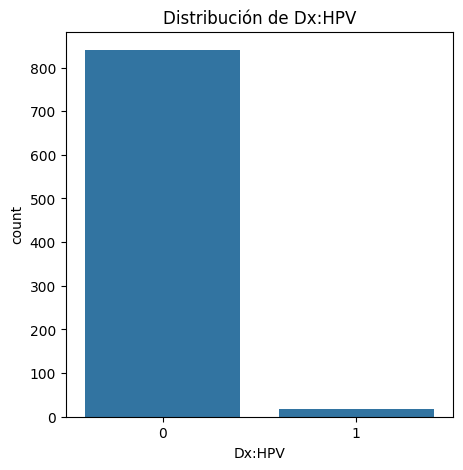

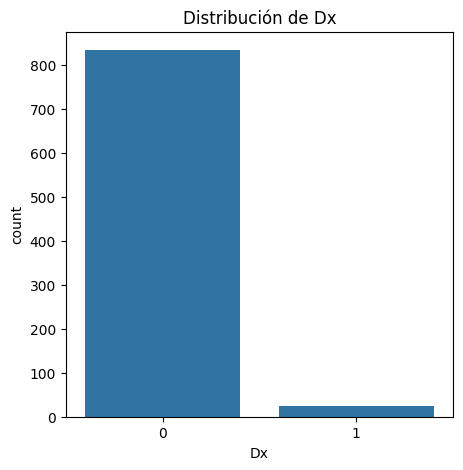

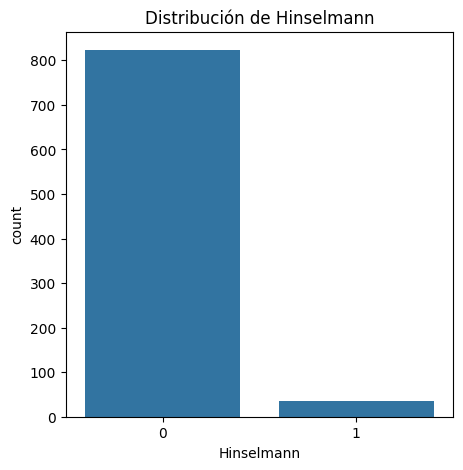

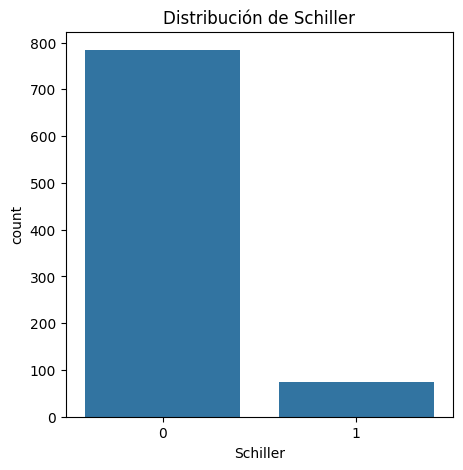

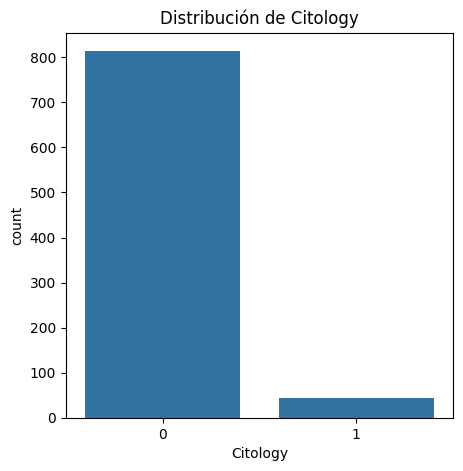

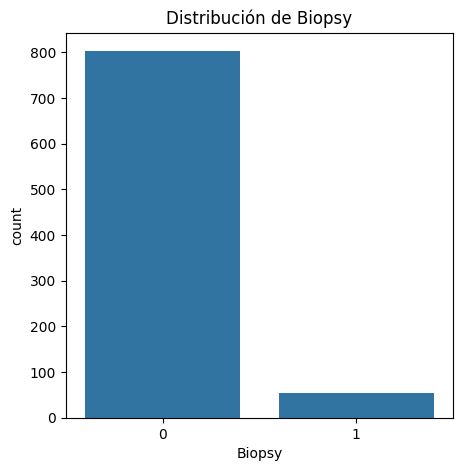

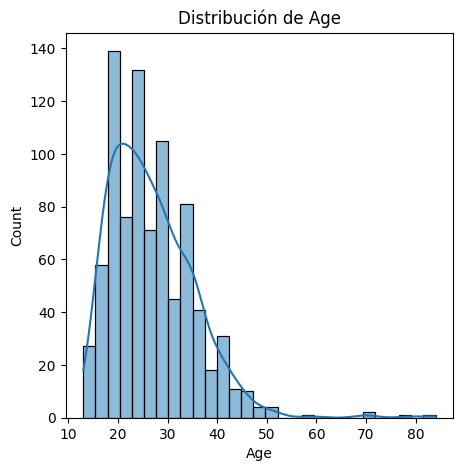

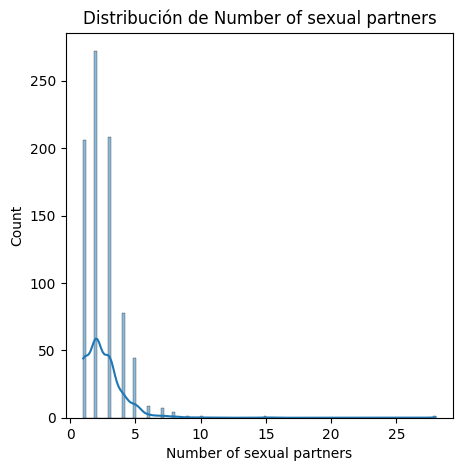

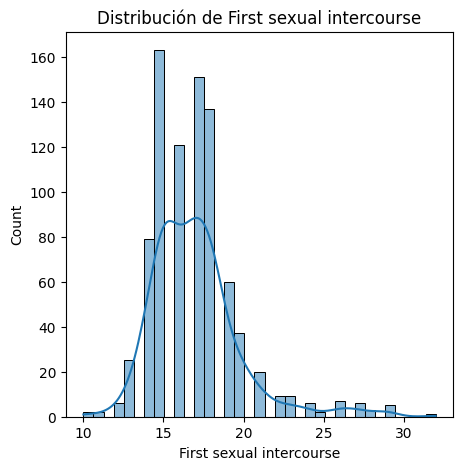

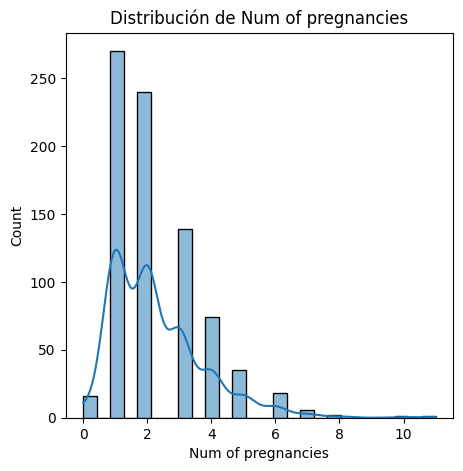

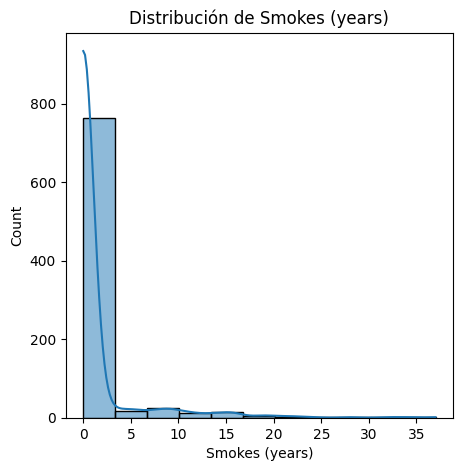

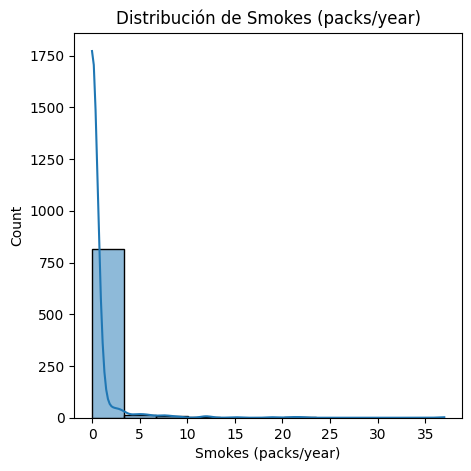

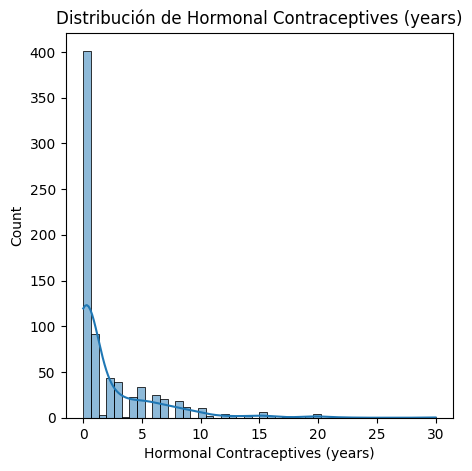

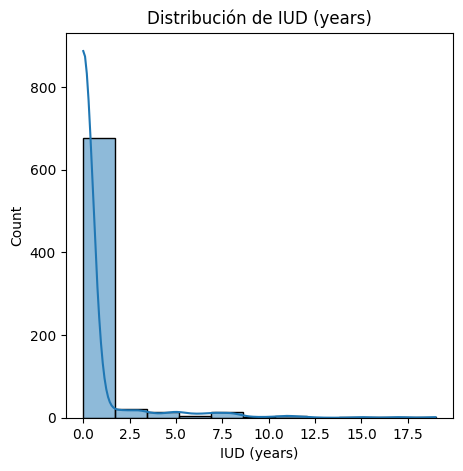

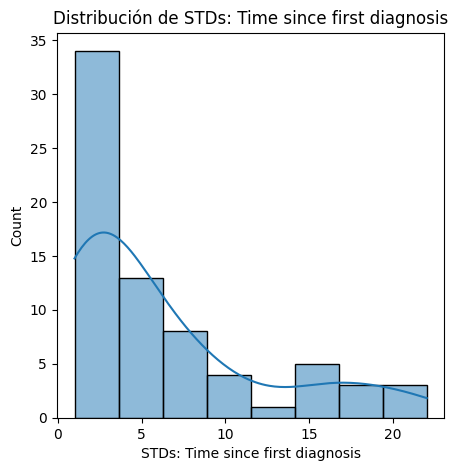

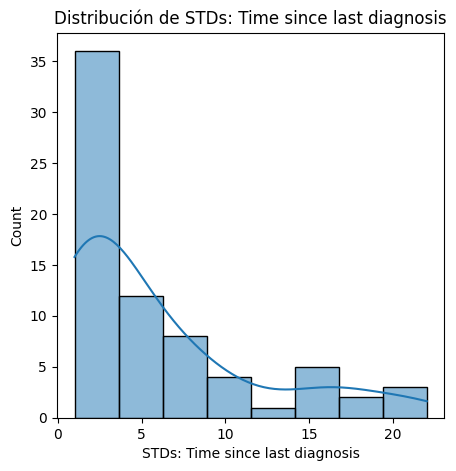

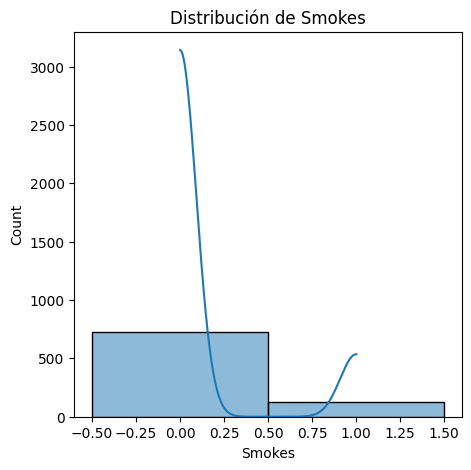

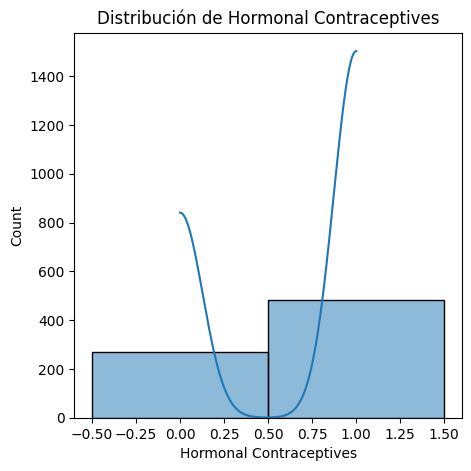

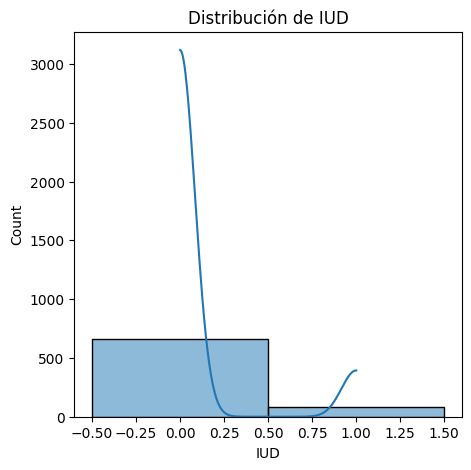

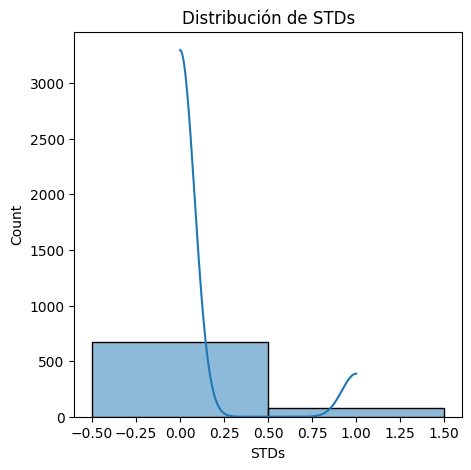

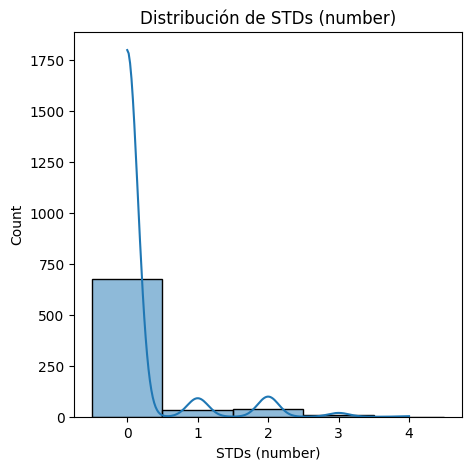

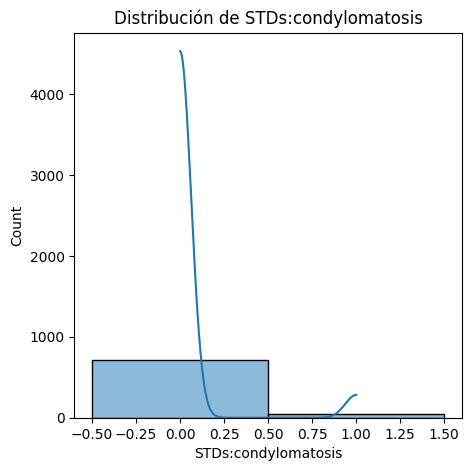

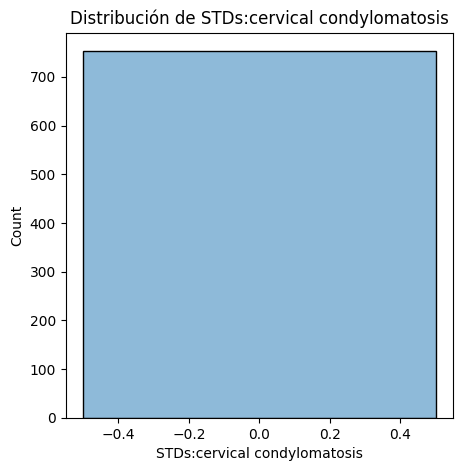

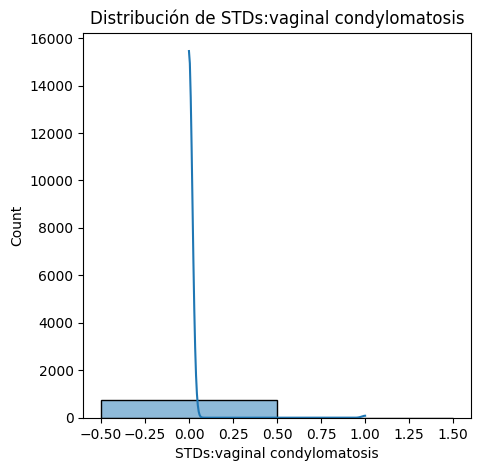

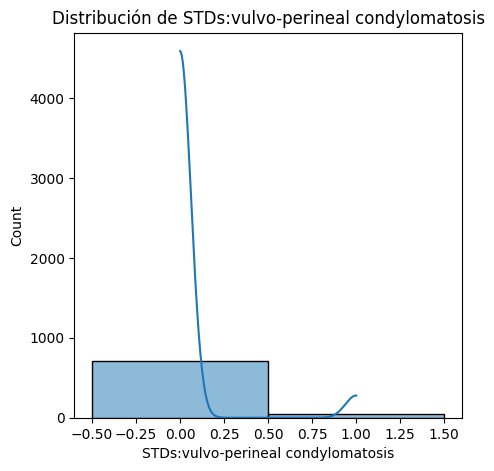

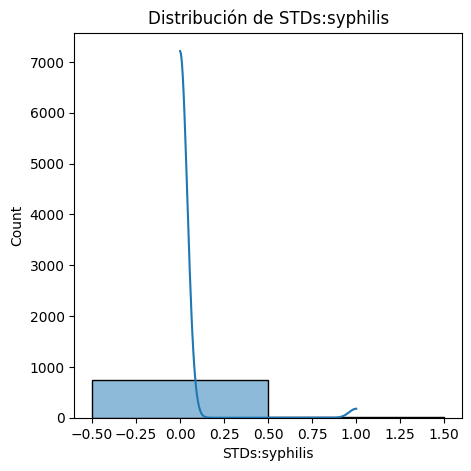

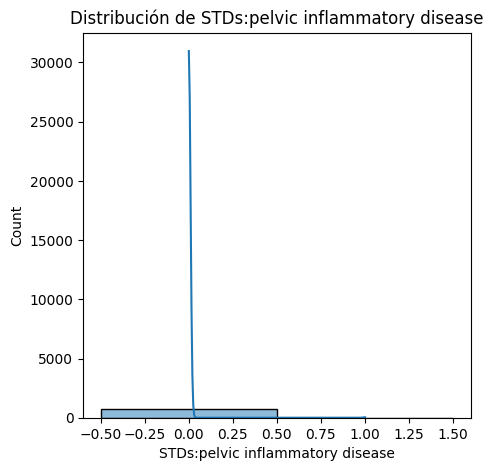

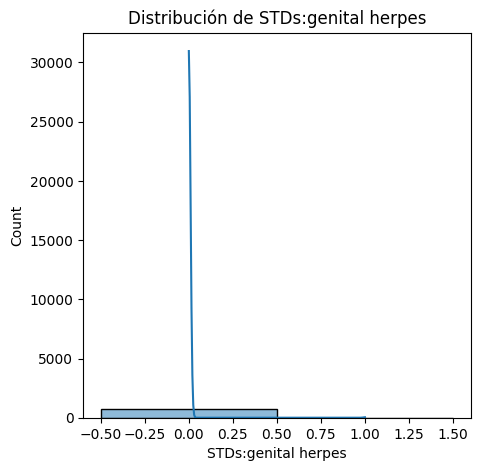

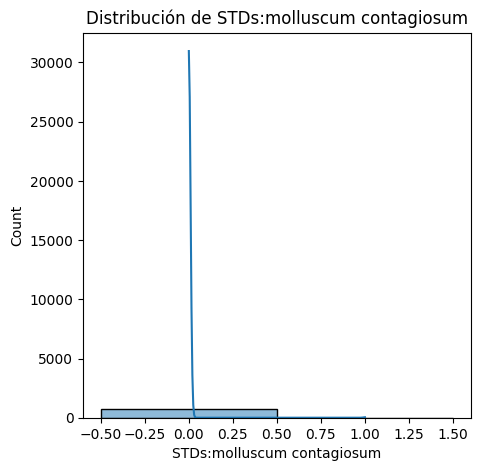

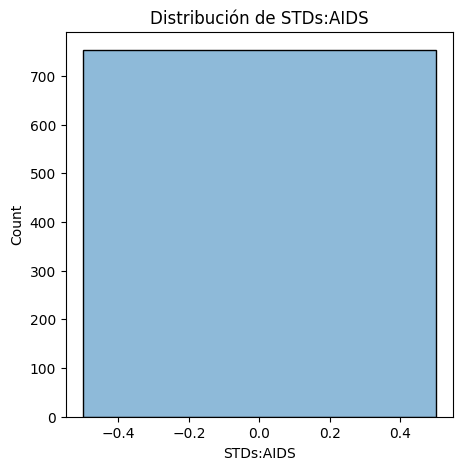

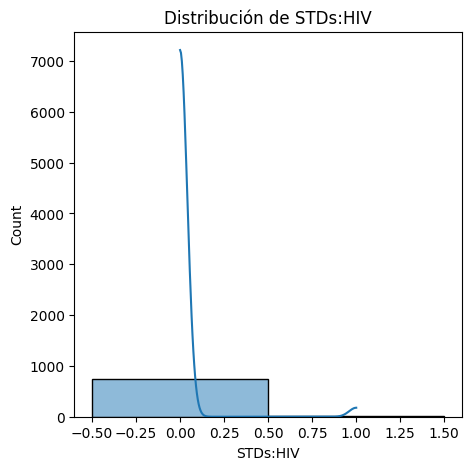

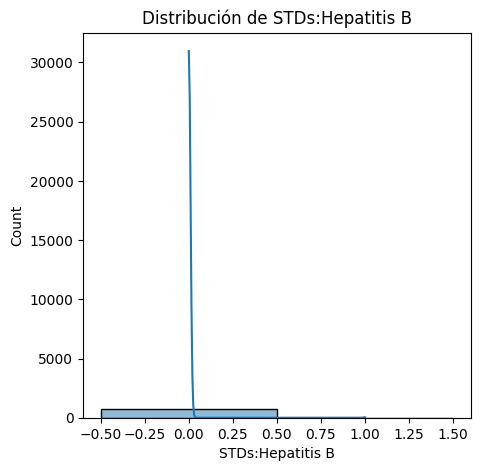

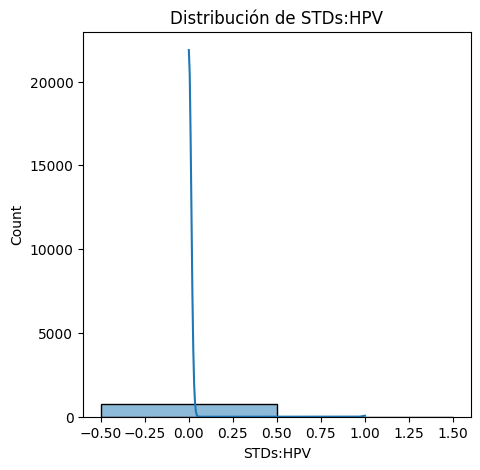

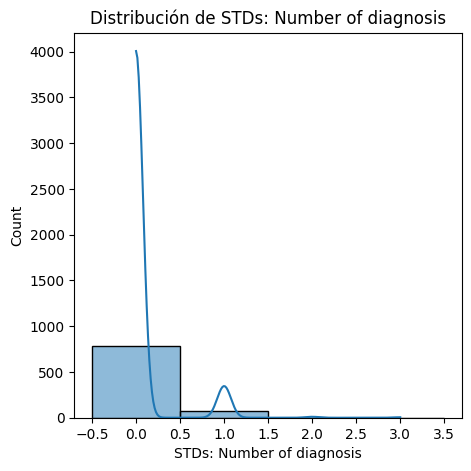

In [12]:
import seaborn as sns

# Separar las variables por tipo
variables_cualitativas = [col for col, tipo in variable_types.items() if 'Cualitativa' in tipo]
variables_cuantitativas_continuas = [col for col, tipo in variable_types.items() if tipo == 'Cuantitativa continua']
variables_cuantitativas_discretas = [col for col, tipo in variable_types.items() if tipo == 'Cuantitativa discreta']

# Gráficos para variables cualitativas
for col in variables_cualitativas:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=X[col])
    plt.title(f'Distribución de {col}')
    plt.show()

# Gráficos para variables cuantitativas continuas
for col in variables_cuantitativas_continuas:
    plt.figure(figsize=(5, 5))
    sns.histplot(X[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# Gráficos para variables cuantitativas discretas
for col in variables_cuantitativas_discretas:
    plt.figure(figsize=(5, 5))
    sns.histplot(X[col].dropna(), kde=True, discrete=True)
    plt.title(f'Distribución de {col}')
    plt.show()

### Análisis de correlación entre variables cuantitativas.

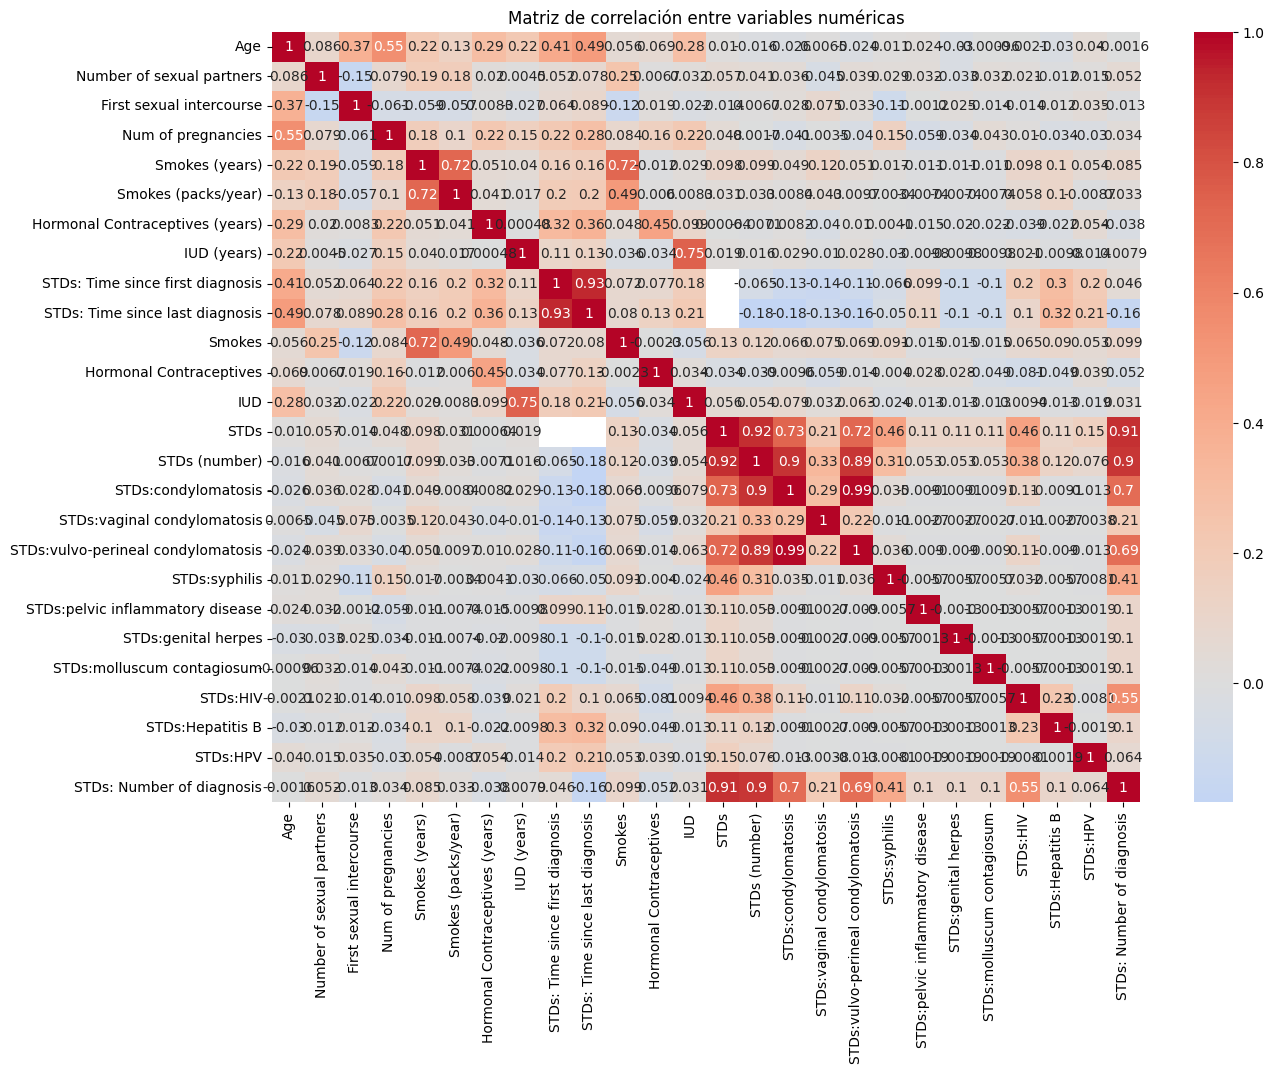

In [17]:
# Aislar variables numéricas (continuas y discretas)
numeric_vars = variables_cuantitativas_continuas + variables_cuantitativas_discretas
numeric_data = X[numeric_vars]

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Eliminar filas y columnas completamente en blanco (es decir, con solo valores nulos)
correlation_matrix = correlation_matrix.dropna(how='all').dropna(axis=1, how='all')

# Mapa de calor de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

### Tablas de frecuencia, proporción y gráficos para las variables categóricas.

,Frecuencia,Proporción (%)
Dx:Cancer,,
0,840,97.90%
1,18,2.10%


,Frecuencia,Proporción (%)
Dx:CIN,,
0,849,98.95%
1,9,1.05%


,Frecuencia,Proporción (%)
Dx:HPV,,
0,840,97.90%
1,18,2.10%


,Frecuencia,Proporción (%)
Dx,,
0,834,97.20%
1,24,2.80%


,Frecuencia,Proporción (%)
Hinselmann,,
0,823,95.92%
1,35,4.08%


,Frecuencia,Proporción (%)
Schiller,,
0,784,91.38%
1,74,8.62%


,Frecuencia,Proporción (%)
Citology,,
0,814,94.87%
1,44,5.13%


,Frecuencia,Proporción (%)
Biopsy,,
0,803,93.59%
1,55,6.41%


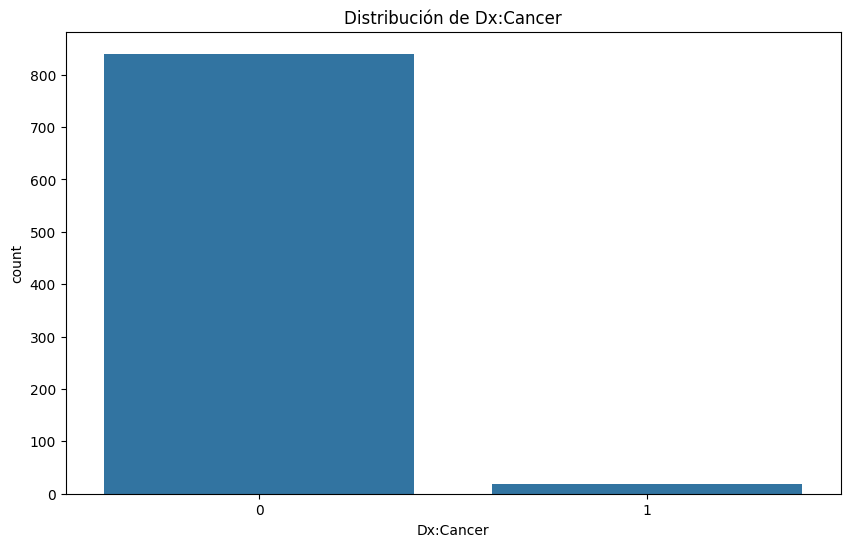

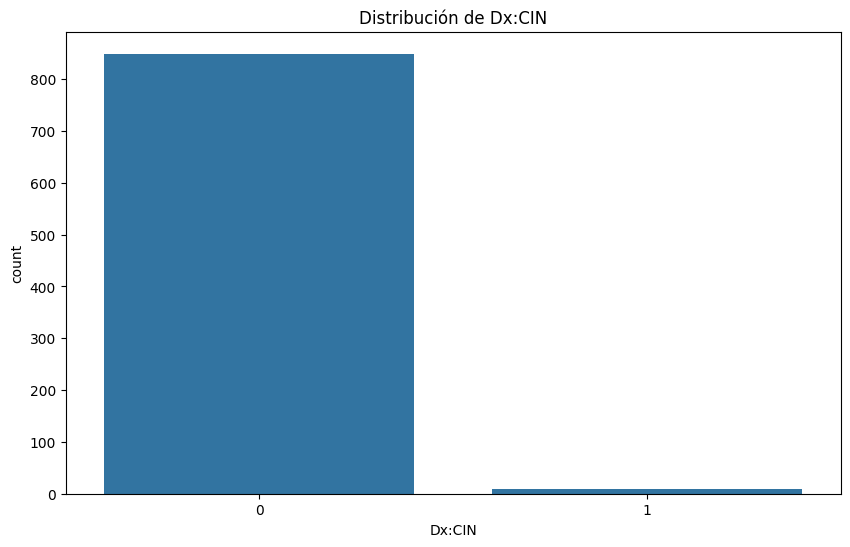

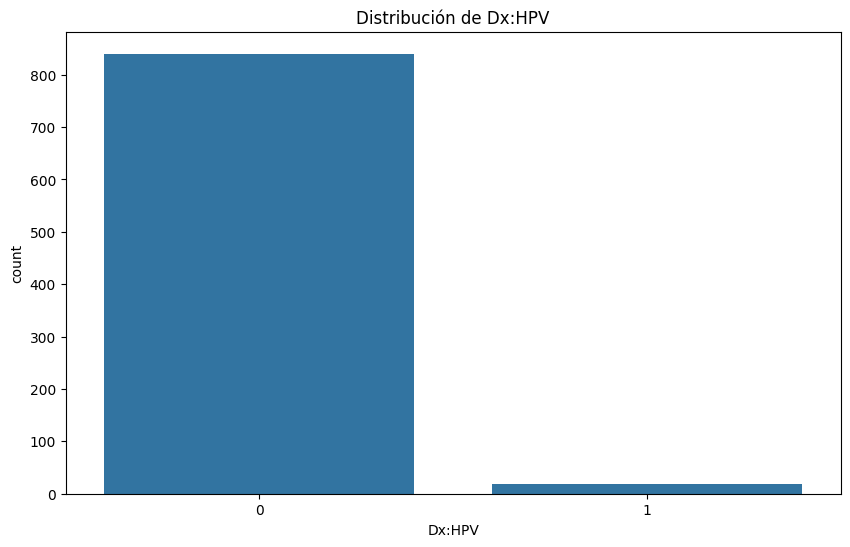

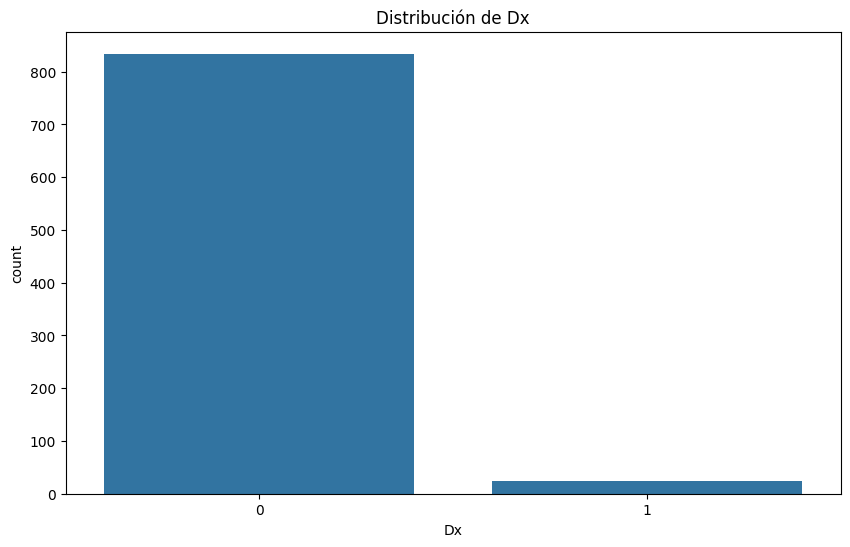

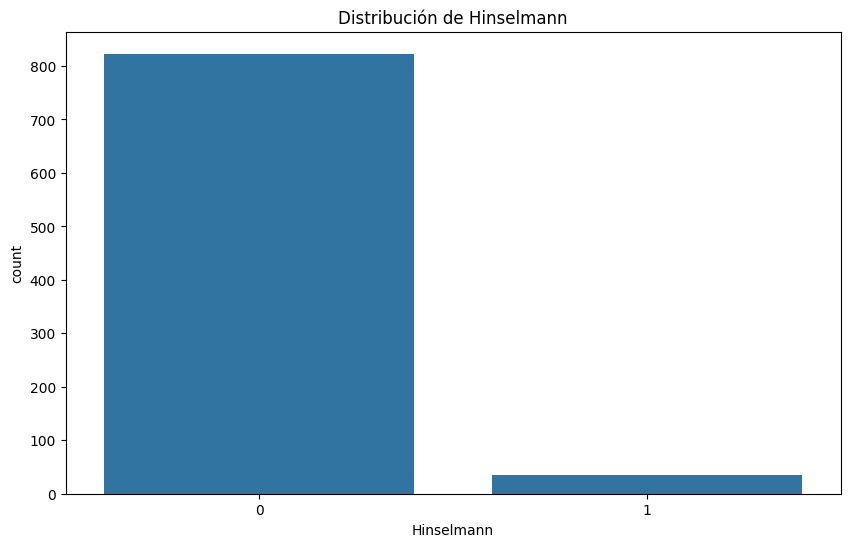

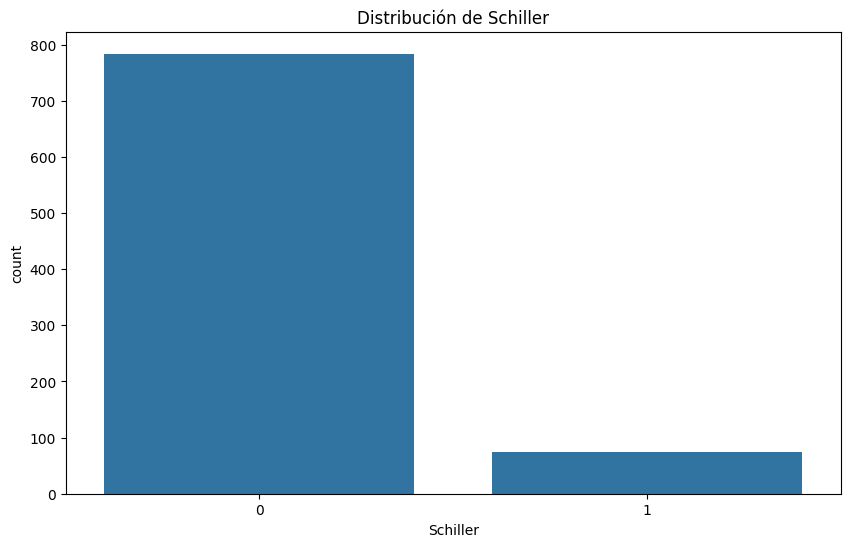

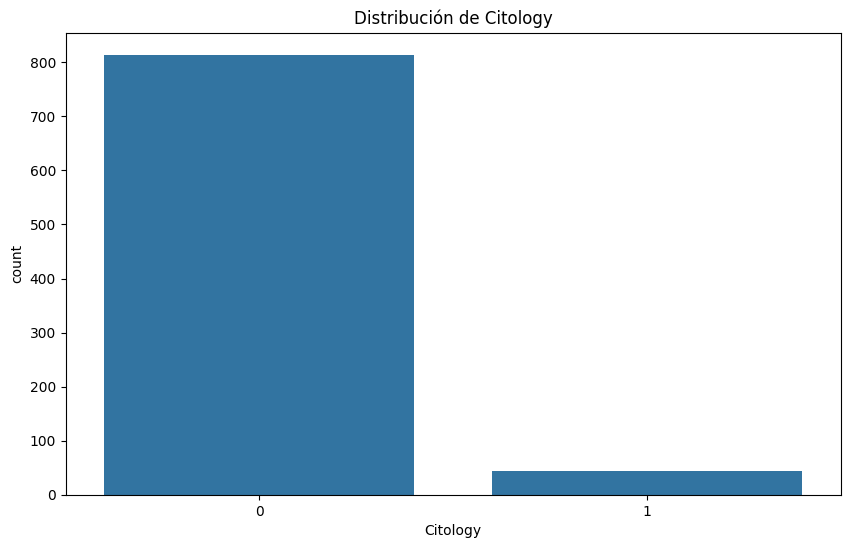

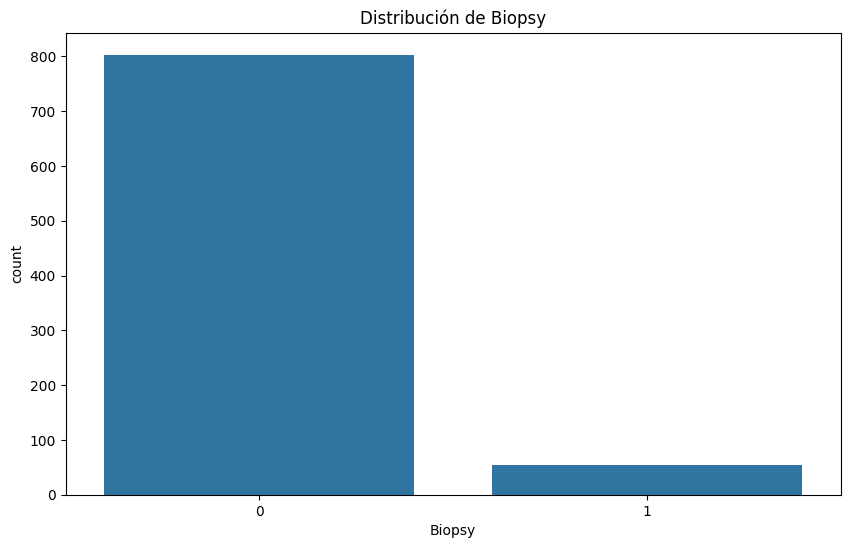

In [18]:
# Función para crear tablas de frecuencia y proporción
def frequency_table(variable):
    freq_table = X[variable].value_counts()
    prop_table = X[variable].value_counts(normalize=True) * 100
    freq_prop_df = pd.DataFrame({'Frecuencia': freq_table, 'Proporción (%)': prop_table})
    return freq_prop_df

# Función para mostrar las tablas de frecuencia y proporción con formato mejorado
def display_frequency_table(variable):
    freq_prop_df = frequency_table(variable)
    display(freq_prop_df.style.format({'Frecuencia': '{:,}', 'Proporción (%)': '{:.2f}%'}).set_caption(f'Tabla de Frecuencia y Proporción para {variable}'))

# Generar y mostrar tablas de frecuencia y proporción para variables cualitativas
for var in variables_cualitativas:
    display_frequency_table(var)

# Gráfico de barras para variables cualitativas
for var in variables_cualitativas:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=X[var])
    plt.title(f'Distribución de {var}')
    plt.show()

### Limpieza de datos faltantes

Se procederá a realizar un análisis a la data faltante

In [14]:
valores_faltantes = df.isnull().sum()
 
filtred_values = valores_faltantes[valores_faltantes > 0].sort_values(ascending=False)
 
print("Variables con valores faltantes (ordenadas en orden descendente):")
print(filtred_values)


Variables con valores faltantes (ordenadas en orden descendente):
STDs: Time since last diagnosis       787
STDs: Time since first diagnosis      787
IUD                                   117
IUD (years)                           117
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
STDs:vulvo-perineal condylomatosis    105
STDs:HPV                              105
STDs:Hepatitis B                      105
STDs:HIV                              105
STDs:AIDS                             105
STDs:molluscum contagiosum            105
STDs:genital herpes                   105
STDs:pelvic inflammatory disease      105
STDs:syphilis                         105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:condylomatosis                   105
STDs (number)                         105
STDs                                  105
Num of pregnancies                     56
Number of sexual partners              26
Smokes (pa

In [15]:
porcentaje_faltantes = (filtred_values / len(df)) * 100
print("\nPorcentaje de valores faltantes en cada variable:")
print(porcentaje_faltantes)


Porcentaje de valores faltantes en cada variable:
STDs: Time since last diagnosis       91.724942
STDs: Time since first diagnosis      91.724942
IUD                                   13.636364
IUD (years)                           13.636364
Hormonal Contraceptives               12.587413
Hormonal Contraceptives (years)       12.587413
STDs:vulvo-perineal condylomatosis    12.237762
STDs:HPV                              12.237762
STDs:Hepatitis B                      12.237762
STDs:HIV                              12.237762
STDs:AIDS                             12.237762
STDs:molluscum contagiosum            12.237762
STDs:genital herpes                   12.237762
STDs:pelvic inflammatory disease      12.237762
STDs:syphilis                         12.237762
STDs:cervical condylomatosis          12.237762
STDs:vaginal condylomatosis           12.237762
STDs:condylomatosis                   12.237762
STDs (number)                         12.237762
STDs                                 

In [10]:
# Eliminar las variables con altos valores faltantes
df = df.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'])
 
# Verificar que las columnas han sido eliminadas
print(df.head())

   Age  Number of sexual partners  First sexual intercourse  \
0   18                        4.0                      15.0   
1   15                        1.0                      14.0   
2   34                        1.0                       NaN   
3   52                        5.0                      16.0   
4   46                        3.0                      21.0   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 1.0     0.0             0.0                  0.0   
1                 1.0     0.0             0.0                  0.0   
2                 1.0     0.0             0.0                  0.0   
3                 4.0     1.0            37.0                 37.0   
4                 4.0     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      0.0                              0.0  0.0  ...   
1                      0.0                            

In [11]:
# Eliminar todas las filas que contienen valores faltantes en cualquier columna
df = df.dropna()

# Guardar el dataframe limpio en un nuevo archivo CSV (opcional)
df.to_csv('cervical_cancer_data_cleaned.csv', index=False)